# INTRODUCTION


<br>Content:
1. [İmport Data](#1)
1. [Normalization](#2)
1. [Logistic Regression Classification](#3)
1. [K-Nearest Neighbors Classification](#4)
1. [Naive Bayes Classification](#5)
1. [Random Forrest Classification](#6)
1. [Support Vector Machines Classification](#7)
1. [Decision Tree Classification](#8)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# İmport Data
<a id="1"></a>

In [2]:
data=pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data["class"]=[1 if each =="Abnormal" else 0 for each in data["class"] ]

In [5]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [6]:
y=data["class"].values
x_data= data.drop(["class"],axis=1)
x_data.head()



,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


# Normalization

<a id="2"></a>

In [7]:
x=(x_data - np.min(x_data))/(np.max(x_data)- np.min(x_data))

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [8]:
x.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


# Logistic Regression Classification
<a id="3"></a>

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train.T, y_train.T)

print("test accury {}".format(lr.score(x_test.T, y_test.T)*100))

test accury 77.41935483870968


### test accury 77.42

# K-Nearest Neighbors Classification
<a id="4"></a>

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 13)# n_neighbors = k

knn.fit(x_train,y_train)

prediction = knn.predict(x_test)


print("{} knn score: {}".format("13",knn.score(x_test, y_test)*100))

13 knn score: 78.49462365591397


###  accury: 78.50

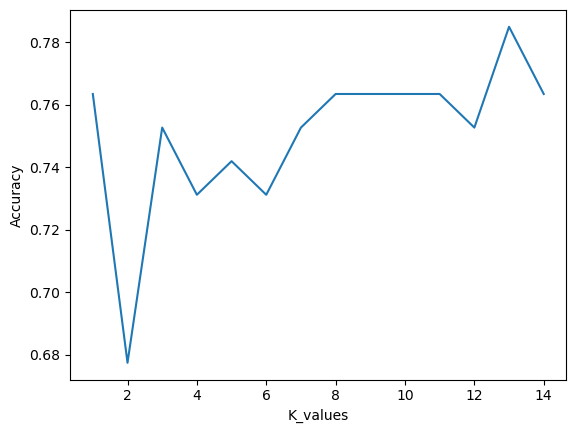

In [13]:
score_list=[]

for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("K_values")
plt.ylabel("Accuracy")
plt.show()

### Best choice for knn its a thirteen 

# Naive Bayes Classification
<a id="5"></a>

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [15]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

print(" naive bayes Accuracy rate : ",nb.score(x_test,y_test)*100)

 naive bayes Accuracy rate :  81.72043010752688


###  naive bayes Accuracy rate :  81.72

# Random Forrest Classification
<a id="6"></a>

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test)*100)

random forest algo result:  85.1063829787234


### random forest algo result:  85.1

# Support Vector Machines Classification
<a id="7"></a>

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [19]:
from sklearn.svm import SVC
 
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

print(" accuracy of svm algo: ",svm.score(x_test,y_test)*100)


 accuracy of svm algo:  80.64516129032258


### accuracy of svm algo:  80.65

# Decision Tree Classification
<a id="8"></a>

In [20]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print(" Decision Tree Classifier of Accuracy rate: ", dt.score(x_test,y_test)*100)


 Decision Tree Classifier of Accuracy rate:  74.46808510638297
